In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from numba import cuda
from sklearn.model_selection import StratifiedKFold
import cv2
from sklearn.preprocessing import OneHotEncoder

In [2]:
X_ = joblib.load("converted_img.pkl")
y_ = joblib.load("label.pkl")

In [3]:
X = joblib.load("CV2_float32.pkl")
y = joblib.load("label.pkl")

In [4]:
encoder = OneHotEncoder(sparse=False)
y = y.reshape(-1, 1)
encoder.fit(y)
y = encoder.transform(y)

In [5]:
X = np.append(X, X_)

In [8]:
X = X.reshape(-1, 32, 32, 3)

In [15]:
y = np.append(y, y, axis=0)

In [26]:
y_ = encoder.transform(y_.reshape(-1, 1))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, stratify=y_, shuffle=True)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

In [42]:
es = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=10, mode="max")

In [43]:
Input = keras.layers.Input(shape=X[0].shape)

x = keras.layers.Conv2D(16, kernel_size=7, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x   = keras.layers.BatchNormalization()(x)
shortcut = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.MaxPool2D(2)(x)


x = keras.layers.Dropout(0.2)(x)


shortcut =x
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
shortcut = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)


x = keras.layers.Flatten()(x)
Output = keras.layers.Dense(128, activation="softmax")(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0005), metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100)
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
342/342 [==============================] - 5s 13ms/step - loss: 1.4851 - accuracy: 0.5627 - val_loss: 6.6855 - val_accuracy: 0.1951
Epoch 2/100
342/342 [==============================] - 4s 12ms/step - loss: 0.7190 - accuracy: 0.7152 - val_loss: 1.1138 - val_accuracy: 0.6360
Epoch 3/100
342/342 [==============================] - 4s 13ms/step - loss: 0.5380 - accuracy: 0.7896 - val_loss: 0.6902 - val_accuracy: 0.7431
Epoch 4/100
342/342 [==============================] - 5s 13ms/step - loss: 0.4064 - accuracy: 0.8396 - val_loss: 1.0353 - val_accuracy: 0.6618
Epoch 5/100
342/342 [==============================] - 4s 13ms/step - loss: 0.3545 - accuracy: 0.8629 - val_loss: 0.9963 - val_accuracy: 0.7217
Epoch 6/100
342/342 [==============================] - 4s 13ms/step - loss: 0.3219 - accuracy: 0.8779 - val_loss: 0.3746 - val_accuracy: 0.8626
Epoch 7/100
342/342 [==============================] - 5s 13ms/step - loss: 0.2695 - accuracy: 0.8980 - val_loss: 0.7480 - val_accuracy:

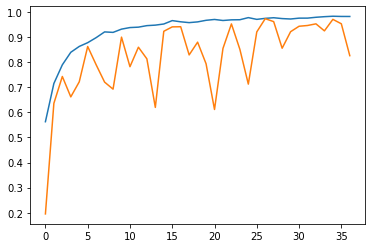

In [49]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [53]:
Input = keras.layers.Input(shape=X[0].shape)

x = keras.layers.Conv2D(16, kernel_size=7, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(32, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)


x = keras.layers.Dropout(0.2)(x)


shortcut =x
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(128, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Dropout(0.2)(x)

shortcut =x
x = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
shortcut = keras.layers.Conv2D(256, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(shortcut)
x = keras.layers.Add()([x, shortcut])
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Flatten()(x)
Output = keras.layers.Dense(128, activation="softmax")(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100)
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
342/342 [==============================] - 9s 22ms/step - loss: 1.2567 - accuracy: 0.5094 - val_loss: 6.0108 - val_accuracy: 0.1843
Epoch 2/100
342/342 [==============================] - 7s 20ms/step - loss: 0.8914 - accuracy: 0.6069 - val_loss: 1.6057 - val_accuracy: 0.38520.8933 - ac
Epoch 3/100
342/342 [==============================] - 7s 20ms/step - loss: 0.8027 - accuracy: 0.6413 - val_loss: 1.1913 - val_accuracy: 0.5055
Epoch 4/100
342/342 [==============================] - 7s 20ms/step - loss: 0.7376 - accuracy: 0.6669 - val_loss: 1.0158 - val_accuracy: 0.5698
Epoch 5/100
342/342 [==============================] - 7s 20ms/step - loss: 0.6785 - accuracy: 0.7019 - val_loss: 0.9936 - val_accuracy: 0.5841
Epoch 6/100
342/342 [==============================] - 7s 20ms/step - loss: 0.6330 - accuracy: 0.7190 - val_loss: 1.1246 - val_accuracy: 0.5363
Epoch 7/100
342/342 [==============================] - 7s 20ms/step - loss: 0.6001 - accuracy: 0.7433 - val_loss: 0.9858 - va

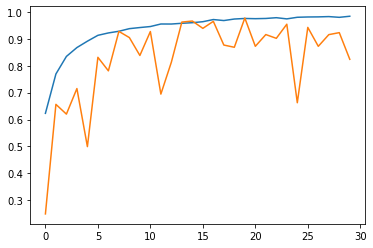

In [51]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y, shuffle=True)

In [51]:
Input = keras.layers.Input(shape=X[0].shape)
x = keras.layers.Conv2D(16, kernel_size=7, activation="relu",kernel_initializer="he_normal", padding="same")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(32, kernel_size=5, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x   = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(64, kernel_size=3, activation="relu",kernel_initializer="he_normal", padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Flatten()(x)
Output = keras.layers.Dense(4, activation="softmax")(x)

model = keras.models.Model(inputs = Input, outputs = Output)
model.compile(loss="categorical_crossentropy",
optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),callbacks=[es],epochs = 100)
print("Train: ", model.evaluate(X_train, y_train))
print("Valid: ", model.evaluate(X_test, y_test))

Epoch 1/100
171/171 [==============================] - 3s 12ms/step - loss: 1.0540 - accuracy: 0.5756 - val_loss: 1.7775 - val_accuracy: 0.2242
Epoch 2/100
171/171 [==============================] - 2s 10ms/step - loss: 0.6001 - accuracy: 0.7720 - val_loss: 1.3620 - val_accuracy: 0.3995
Epoch 3/100
171/171 [==============================] - 1s 8ms/step - loss: 0.4418 - accuracy: 0.8469 - val_loss: 0.6870 - val_accuracy: 0.7297
Epoch 4/100
171/171 [==============================] - 1s 8ms/step - loss: 0.3390 - accuracy: 0.8978 - val_loss: 0.4325 - val_accuracy: 0.8533
Epoch 5/100
171/171 [==============================] - 2s 9ms/step - loss: 0.2596 - accuracy: 0.9313 - val_loss: 0.2974 - val_accuracy: 0.9176
Epoch 6/100
171/171 [==============================] - 1s 8ms/step - loss: 0.2015 - accuracy: 0.9566 - val_loss: 0.2375 - val_accuracy: 0.9401
Epoch 7/100
171/171 [==============================] - 1s 8ms/step - loss: 0.1613 - accuracy: 0.9727 - val_loss: 0.2149 - val_accuracy: 0.94